In [5]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import random
import re
import unicodedata
import datetime
import itertools
%matplotlib inline

In [6]:
def timestamp_to_datetime(timestamp):
    return datetime.date(timestamp.year, timestamp.month, timestamp.day)

In [8]:
g_dat = pd.read_excel('data/box_scores/box_score_2017.xlsx')

In [9]:
g_dat.head()

,ast,blk,drb,fg,fg3,fg3_pct,fg3a,fg_pct,fga,ft,...,stl_pct,tov_pct,trb_pct,ts_pct,usg_pct,g_num,g_id,team,date,season
0,0,2,3,5,3,0.60,5,0.385,13,3,...,1.5,11.3,11.0,0.512,22.7,1,201610250CLE,NYK,2016-10-25,2017
1,3,0,4,8,1,0.25,4,0.444,18,2,...,1.6,17.5,8.6,0.503,32.1,1,201610250CLE,NYK,2016-10-25,2017
2,1,1,1,7,1,0.50,2,0.412,17,2,...,0.0,18.3,5.2,0.475,31.2,1,201610250CLE,NYK,2016-10-25,2017
3,0,1,2,0,0,0.00,2,0.000,5,0,...,0.0,28.6,7.9,0.000,15.1,1,201610250CLE,NYK,2016-10-25,2017
4,3,0,5,0,0,NaN,0,0.000,1,0,...,2.5,50.0,15.9,0.000,4.3,1,201610250CLE,NYK,2016-10-25,2017


In [10]:
def fix_dates(df):
    df = df.reset_index()
    datetimes = []
    for timestamp in df['date']:
        datetimes.append(timestamp_to_datetime(timestamp))
    df['datetime'] = datetimes
    return df

In [11]:
# Weird discrepancy in excel changed datetimes to timestamps--change them back
g_dat = fix_dates(g_dat)

## Create Gini for each game

In [12]:
def get_reg_season(df, yr):
    return df[(df['datetime'] < datetime.date(yr,4,1)) | (df['g_num'] > 7)]

In [13]:
def get_playoffs(df, yr):
    return df[(df['datetime'] > datetime.date(yr,4,1)) & (df['g_num'] <= 7)]

In [14]:
def get_game(df, gid, team):
    return df[(df['g_id'] == gid) & (df['team'] == team)]

In [15]:
g_dat_reg = get_reg_season(g_dat, 2017)
g_dat_reg.head()

,index,ast,blk,drb,fg,fg3,fg3_pct,fg3a,fg_pct,fga,...,tov_pct,trb_pct,ts_pct,usg_pct,g_num,g_id,team,date,season,datetime
0,0,0,2,3,5,3,0.60,5,0.385,13,...,11.3,11.0,0.512,22.7,1,201610250CLE,NYK,2016-10-25,2017,2016-10-25
1,1,3,0,4,8,1,0.25,4,0.444,18,...,17.5,8.6,0.503,32.1,1,201610250CLE,NYK,2016-10-25,2017,2016-10-25
2,2,1,1,1,7,1,0.50,2,0.412,17,...,18.3,5.2,0.475,31.2,1,201610250CLE,NYK,2016-10-25,2017,2016-10-25
3,3,0,1,2,0,0,0.00,2,0.000,5,...,28.6,7.9,0.000,15.1,1,201610250CLE,NYK,2016-10-25,2017,2016-10-25
4,4,3,0,5,0,0,NaN,0,0.000,1,...,50.0,15.9,0.000,4.3,1,201610250CLE,NYK,2016-10-25,2017,2016-10-25


In [16]:
len(np.unique(g_dat['g_id']))

1309

In [17]:
# 1189 games played in the regular season--82 games each for 29 teams (divided by 2)
# 1230 games played in the regular season--82 games each for 30 teams (divided by 2)
len(np.unique(g_dat_reg['g_id']))

1230

In [18]:
game_dict = {tuple(game) for game in zip(g_dat_reg['g_id'], g_dat_reg['team'])}

In [19]:
# 2378 games--82 games each for 29 teams
# 2460 games--82 games each for 30 teams
len(game_dict)

2460

In [20]:
team = 'OKC'
g_dat_reg[g_dat_reg['team'] == team].head()

,index,ast,blk,drb,fg,fg3,fg3_pct,fg3a,fg_pct,fga,...,tov_pct,trb_pct,ts_pct,usg_pct,g_num,g_id,team,date,season,datetime
217,0,9,0,11,11,1,0.500,2,0.524,21,...,7.2,16.5,0.619,31.8,1,201610260PHI,OKC,2016-10-26,2017,2016-10-26
218,1,1,0,3,7,0,NaN,0,0.438,16,...,10.6,7.0,0.474,22.1,1,201610260PHI,OKC,2016-10-26,2017,2016-10-26
219,2,3,1,5,0,0,NaN,0,0.000,2,...,0.0,11.0,0.133,4.9,1,201610260PHI,OKC,2016-10-26,2017,2016-10-26
220,3,1,1,3,4,0,0.000,5,0.250,16,...,14.8,9.6,0.289,32.4,1,201610260PHI,OKC,2016-10-26,2017,2016-10-26
221,4,0,0,4,2,1,0.333,3,0.400,5,...,0.0,12.2,0.500,12.7,1,201610260PHI,OKC,2016-10-26,2017,2016-10-26


In [21]:
g_info = ('201610300OKC','OKC')

In [22]:
game_df = get_game(g_dat, g_info[0], g_info[1])

In [23]:
game_df.head()

,index,ast,blk,drb,fg,fg3,fg3_pct,fg3a,fg_pct,fga,...,tov_pct,trb_pct,ts_pct,usg_pct,g_num,g_id,team,date,season,datetime
864,0,4,0,1,7,3,0.429,7,0.350,20,...,12.3,1.5,0.469,25.0,3,201610300OKC,OKC,2016-10-30,2017,2016-10-30
865,1,16,1,7,11,5,0.833,6,0.524,21,...,22.8,18.2,0.698,36.0,3,201610300OKC,OKC,2016-10-30,2017,2016-10-30
866,2,3,1,5,4,0,0.000,3,0.571,7,...,0.0,9.3,0.508,10.4,3,201610300OKC,OKC,2016-10-30,2017,2016-10-30
867,3,2,2,9,6,0,NaN,0,0.500,12,...,13.4,22.7,0.543,19.9,3,201610300OKC,OKC,2016-10-30,2017,2016-10-30
868,4,0,1,0,0,0,NaN,0,0.000,1,...,0.0,0.0,0.000,5.8,3,201610300OKC,OKC,2016-10-30,2017,2016-10-30


In [24]:
zip(game_df['player'], game_df['usg_pct'])

[(u'Victor Oladipo', 25.0),
 (u'Russell Westbrook', 36.0),
 (u'Andre Roberson', 10.4),
 (u'Steven Adams', 19.9),
 (u'Domantas Sabonis', 5.8),
 (u'Ersan Ilyasova', 12.3),
 (u'Enes Kanter', 23.4),
 (u'Semaj Christon', 14.6),
 (u'Kyle Singler', 10.9),
 (u'Joffrey Lauvergne', 10.0),
 (u'Anthony Morrow', 33.2),
 (u'Alex Abrines', 50.5)]

In [25]:
# Function for calculating usage rate for a team
# team_df: a dataframe of a single team's season statistics
def calculate_weighted_off_usg(game_df):
    # Multiply by MP to weight Gini, essentially MP in numerator and denominator cancel
    weighted_off = [mp * (100 * ((fga + 0.44*fta + tov)) * (float(sum(game_df['sec']))/5)) / 
                (mp * (sum(game_df['fga']) + 0.44*sum(game_df['fta']) + sum(game_df['tov'])))
    for fga, fta, tov, mp in zip(game_df['fga'], game_df['fta'], game_df['tov'], game_df['sec'])]
    return weighted_off

In [26]:
def calculate_weighted_def_usg(game_df):
    weighted_def = [mp * 20 for mp in game_df['sec']]
    return weighted_def

In [27]:
off_usg = calculate_weighted_off_usg(game_df)
def_usg = calculate_weighted_def_usg(game_df)
len(off_usg) == len(def_usg)

True

In [28]:
zip(off_usg, def_usg)

[(57656.898254856766, 46040),
 (72640.10536713862, 40380),
 (18681.593677971683, 36060),
 (35276.91801119525, 35480),
 (2370.7606190319393, 8160),
 (18966.084952255515, 30820),
 (30819.888047415214, 26320),
 (17638.45900559763, 24100),
 (11853.803095159697, 21820),
 (4741.521238063879, 9500),
 (11853.803095159697, 7140),
 (5500.164636154101, 2180)]

In [29]:
weighted_usg = [(o_usg + d_usg)/2 for o_usg, d_usg in zip(off_usg, def_usg)]
weighted_usg

[51848.44912742838,
 56510.05268356931,
 27370.796838985843,
 35378.45900559763,
 5265.380309515969,
 24893.042476127757,
 28569.944023707605,
 20869.229502798815,
 16836.901547579848,
 7120.760619031939,
 9496.901547579848,
 3840.0823180770503]

In [30]:
def calculate_weighted_usg(team_df):
    off_usg = calculate_weighted_off_usg(team_df)
    def_usg = calculate_weighted_def_usg(team_df)
    weighted_usg = [(o_usg + d_usg)/2 for o_usg, d_usg in zip(off_usg, def_usg)]
    return weighted_usg

In [31]:
# Take weighted usage rates, normalize them (sum = 1), sort them
def get_norm_usg(w_usg):
    return sorted([u/sum(w_usg) for u in w_usg])

In [32]:
# Subset only the top k usages, renormalize them
def get_norm_top_k(n_usg, k):
    new_usg = n_usg[-k:]
    return get_norm_usg(new_usg)

In [33]:
# Using the boston df, calculate usage with n=2
usg = calculate_weighted_usg(game_df)
# Normalize usage
n_usg = get_norm_usg(usg)
n_usg

[0.013333619159989755,
 0.018282570519152667,
 0.02472486326052756,
 0.032975352595763355,
 0.05846146370687446,
 0.07246260244027365,
 0.08643417526433247,
 0.09503748902425638,
 0.0992011945267625,
 0.12284187154721396,
 0.18002933724801518,
 0.19621546070683785]

In [34]:
n_usg_k = get_norm_top_k(n_usg, k=9)
n_usg_k

[0.034944142371020386,
 0.06195189892385656,
 0.07678897409493961,
 0.09159471812733905,
 0.100711691782625,
 0.10512399086109697,
 0.13017613188524185,
 0.19077796889314672,
 0.20793048306073383]

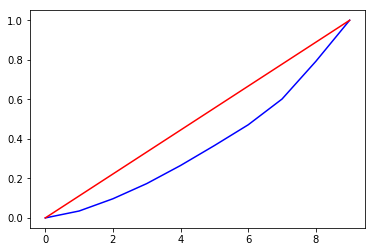

0.299681790245
0.426214101682


In [35]:
# 0 through length
x = range(len(n_usg_k)+1)
#x = range(9)
# Cumulative sum
y1 = np.cumsum([0] + n_usg_k)
#y1 = [0,0,0,0,.1,.2,.3,.4,1]

# y=x line
y2 = [float(t)/(len(x)-1) for t in x]
plt.plot(x, y1, c='b')
plt.plot(x, y2, c='r')
plt.show()

gini = 2*(np.trapz(y2) - np.trapz(y1))/(x[-1]*y1[-1]) * len(n_usg_k)/(len(n_usg_k)-1)
print gini
print 1/.703125 * gini

In [36]:
def get_gini_game(g_dat, g_id, team, k):
    game_df = get_game(g_dat, g_id, team)
    game_df = game_df[game_df['sec'] != 0]
    usg = calculate_weighted_usg(game_df)
    n_usg = get_norm_usg(usg)
    n_usg_k = get_norm_top_k(n_usg, k=k)
    
    x = range(len(n_usg_k)+1)
    y1 = np.cumsum([0] + n_usg_k)
    y2 = [float(t)/(len(x)-1) for t in x]
    gini = 2*(np.trapz(y2) - np.trapz(y1))/(x[-1]*y1[-1]) * len(n_usg_k)/(len(n_usg_k)-1)
    return gini

In [37]:
get_gini_game(g_dat, g_info[0], g_info[1], 9)

0.29968179024527181

In [38]:
def id_to_date(g_id):
    return g_id[4:6] + '/' + g_id[6:8] + '/' + g_id[0:4] 

In [39]:
id_to_date(g_info[0])

'10/30/2016'

In [55]:
def plot_gini_game(g_dat, g_id, team, k):
    game_df = get_game(g_dat, g_id, team)
    game_df = game_df[game_df['sec'] != 0]
    usg = calculate_weighted_usg(game_df)
    n_usg = get_norm_usg(usg)
    n_usg_k = get_norm_top_k(n_usg, k=k)
    
    x = range(len(n_usg_k)+1)
    y1 = np.cumsum([0] + n_usg_k)
    y2 = [float(t)/(len(x)-1) for t in x]
    gini = 2*(np.trapz(y2) - np.trapz(y1))/(x[-1]*y1[-1]) * len(n_usg_k)/(len(n_usg_k)-1)
    
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111)
    fig.subplots_adjust(top=0.85)

    ax.set_xlabel('Player')
    ax.set_ylabel('Cumulative weighted usage')

    ax.text(1.5, 0.5, 'Gini: '+ str(round(gini,4)), fontsize=12)
    
    ax.plot(x, y1, c='black')
    ax.plot(x, y2, c='black')
    ax.fill_between(x, y1, y2, where=y2 >= y1, facecolor='b', interpolate=True)
    ax.set_title('Team: ' + team + ', Game: ' + id_to_date(g_id))
    plt.show()

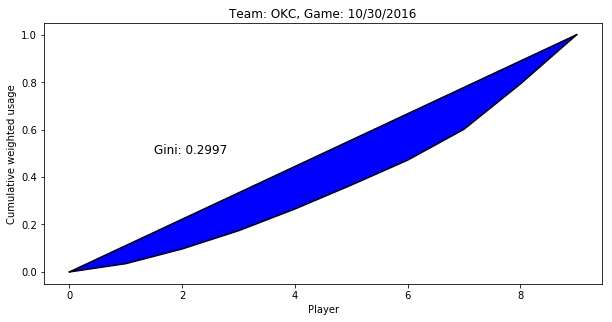

In [56]:
plot_gini_game(g_dat, g_info[0], g_info[1], 9)

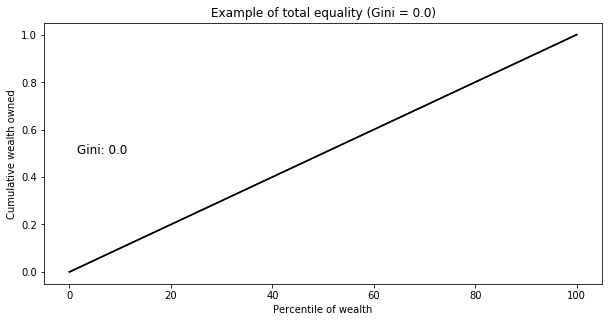

In [52]:
n_usg_k = [.01] * 100
x = range(len(n_usg_k)+1)
y1 = np.cumsum([0] + n_usg_k)
y2 = [float(t)/(len(x)-1) for t in x]
gini = 2*(np.trapz(y2) - np.trapz(y1))/(x[-1]*y1[-1]) * len(n_usg_k)/(len(n_usg_k)-1)
#print gini

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)

ax.set_xlabel('Percentile of wealth')
ax.set_ylabel('Cumulative wealth owned')

ax.text(1.5, 0.5, 'Gini: '+ str(0.0), fontsize=12)

ax.plot(x, y1, c='black')
ax.plot(x, y2, c='black')
ax.fill_between(x, y1, y2, where=y2 >= y1, facecolor='b', interpolate=True)
ax.set_title('Example of total equality (Gini = 0.0)')
plt.show()

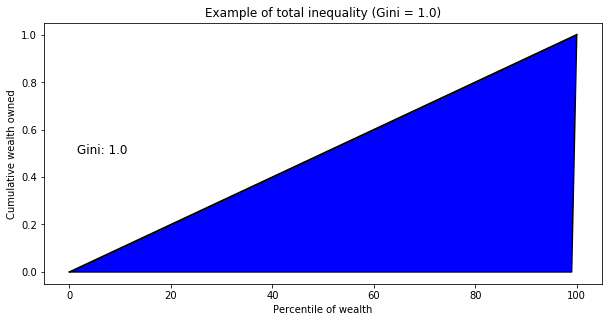

In [54]:
n_usg_k = [0] * 99 + [1]
x = range(len(n_usg_k)+1)
y1 = np.cumsum([0] + n_usg_k)
y2 = [float(t)/(len(x)-1) for t in x]
gini = 2*(np.trapz(y2) - np.trapz(y1))/(x[-1]*y1[-1]) * len(n_usg_k)/(len(n_usg_k)-1)
#print gini

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)

ax.set_xlabel('Percentile of wealth')
ax.set_ylabel('Cumulative wealth owned')

ax.text(1.5, 0.5, 'Gini: '+ str(1.0), fontsize=12)

ax.plot(x, y1, c='black')
ax.plot(x, y2, c='black')
ax.fill_between(x, y1, y2, where=y2 >= y1, facecolor='b', interpolate=True)
ax.set_title('Example of total inequality (Gini = 1.0)')
plt.show()

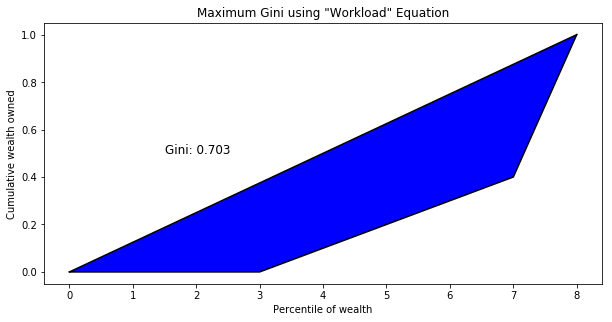

In [60]:
x = range(9)
y1 = [0,0,0,0,.1,.2,.3,.4,1]
y2 = [float(t)/(len(x)-1) for t in x]
gini = 2*(np.trapz(y2) - np.trapz(y1))/(x[-1]*y1[-1]) * len(x)/(len(x)-1)
#print gini

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)

ax.set_xlabel('Percentile of wealth')
ax.set_ylabel('Cumulative wealth owned')

ax.text(1.5, 0.5, 'Gini: '+ str(round(gini,3)), fontsize=12)

ax.plot(x, y1, c='black')
ax.plot(x, y2, c='black')
ax.fill_between(x, y1, y2, where=y2 >= y1, facecolor='b', interpolate=True)
ax.set_title('Maximum Gini using "Workload" Equation')
plt.show()

## Calculate game Ginis for all games, all seasons

In [ ]:
def timestamp_to_datetime(timestamp):
    return datetime.date(timestamp.year, timestamp.month, timestamp.day)

In [ ]:
g_dat = pd.read_excel('data/box_scores/box_score_2017.xlsx')

In [ ]:
def fix_dates(df):
    df = df.reset_index()
    datetimes = []
    for timestamp in df['date']:
        datetimes.append(timestamp_to_datetime(timestamp))
    df['datetime'] = datetimes
    return df

In [ ]:
# Weird discrepancy in excel changed datetimes to timestamps--change them back
g_dat = fix_dates(g_dat)

In [ ]:
g_dat_reg = get_reg_season(g_dat, 2017)
g_dat_reg.head()

In [ ]:
game_dict = {tuple(game) for game in zip(g_dat_reg['g_id'], g_dat_reg['team'])}

In [ ]:
# 2378 games--82 games each for 29 teams
# 2460 games--82 games each for 30 teams
len(game_dict)

In [ ]:
g_info = ('201610300OKC','OKC')

In [ ]:
game_df = get_game(g_dat, g_info[0], g_info[1])

In [85]:
yr = 2017
g_dat = pd.read_excel('data/box_scores/box_score_' + str(yr) + '.xlsx')
g_dat = fix_dates(g_dat)
g_dat_reg = get_reg_season(g_dat, yr)
game_dict = {tuple(game) for game in zip(g_dat_reg['g_id'], g_dat_reg['team'])}
print len(game_dict)

2460


In [90]:
for key in game_dict:
    print key

(u'201701020CHI', u'CHH')
(u'201704120BOS', u'BOS')
(u'201612310CHI', u'CHI')
(u'201612010CLE', u'CLE')
(u'201612300WAS', u'BRK')
(u'201701310WAS', u'NYK')
(u'201701220MIN', u'DEN')
(u'201703150MIA', u'MIA')
(u'201612110PHO', u'PHO')
(u'201701020HOU', u'WAS')
(u'201612260MIN', u'MIN')
(u'201611020CHO', u'CHH')
(u'201702130DAL', u'BOS')
(u'201701290ATL', u'ATL')
(u'201702240ATL', u'ATL')
(u'201703200ORL', u'PHI')
(u'201702230GSW', u'GSW')
(u'201702020HOU', u'ATL')
(u'201702010DAL', u'DAL')
(u'201702130WAS', u'OKC')
(u'201611290MIL', u'CLE')
(u'201701240TOR', u'SAS')
(u'201611280TOR', u'TOR')
(u'201701200HOU', u'HOU')
(u'201612020PHI', u'ORL')
(u'201611200SAC', u'TOR')
(u'201703060CHO', u'IND')
(u'201701250POR', u'LAL')
(u'201703190NOP', u'MIN')
(u'201612200CHO', u'CHH')
(u'201701050HOU', u'HOU')
(u'201703260HOU', u'HOU')
(u'201612180PHI', u'PHI')
(u'201611020PHO', u'POR')
(u'201703060PHI', u'MIL')
(u'201612020TOR', u'LAL')
(u'201612290PHO', u'TOR')
(u'201611140NOP', u'BOS')
(u'201612140

In [109]:
g_id = '201611090WAS'
team = 'BOS'
teams = list(np.unique(g_dat[g_dat['g_id'] == g_id]['team']))
teams.remove(team)
opp = teams[0]
str(opp)

'WAS'

In [124]:
g_id = '201611090WAS'
team = 'BOS'

game_df = g_dat[g_dat['g_id'] == g_id]

# get opponent
teams = list(np.unique(game_df['team']))
teams.remove(team)
opp = str(teams[0])

team_df = game_df[game_df['team'] == team]
date = id_to_date(g_id)
g_num = team_df['g_num'].iloc[0]

game_df['sec']

2510    2303
2511    2125
2512    1434
2513     858
2514     793
2515    2189
2516    1568
2517     843
2518     692
2519     687
2520     459
2521     225
2522     225
2523    2296
2524    1933
2525    1855
2526    1007
2527     651
2528    2050
2529    1893
2530    1025
2531     833
2532     320
2533     179
2534     179
2535     179
Name: sec, dtype: int64

In [129]:
#yrs = range(2003, 2018)

yr = 2017
g_dat = pd.read_excel('data/box_scores/box_score_' + str(yr) + '.xlsx')
g_dat = fix_dates(g_dat)
g_dat_reg = get_reg_season(g_dat, yr)
game_dict = {tuple(game) for game in zip(g_dat_reg['g_id'], g_dat_reg['team'])}
print len(game_dict)

game_ginis = pd.DataFrame()
for g_info in game_dict:
    g_id = g_info[0]
    team = g_info[1]
    print g_id, team
    game_df = g_dat[g_dat['g_id'] == g_id]
    game_df = game_df[game_df['sec'] != 0]
    
    # get opponent
    teams = list(np.unique(game_df['team']))
    teams.remove(team)
    opp = str(teams[0])
    
    team_df = game_df[game_df['team'] == team]
    date = id_to_date(g_id)
    g_num = team_df['g_num'].iloc[0]
    
    gini8 = get_gini_game(g_dat, g_id, team, 8)
    gini = get_gini_game(g_dat, g_id, team, 9)
    #gini10 = get_gini_season(yr, team, k=10)
    game_ginis = game_ginis.append({'team': team,
                                    'season': yr,
                                    'gini': gini,
                                    'gini8': gini8,
                                    'opp': opp,
                                    'g_id': g_id,
                                    'g_num': g_num}, 
                                    ignore_index=True)
game_ginis.to_excel('data/game_ginis/games_ginis_' + str(yr) + '_new.xlsx')

2460
201701020CHI CHH
201704120BOS BOS
201612310CHI CHI
201612010CLE CLE
201612300WAS BRK
201701310WAS NYK
201701220MIN DEN
201703150MIA MIA
201612110PHO PHO
201701020HOU WAS
201612260MIN MIN
201611020CHO CHH
201702130DAL BOS
201701290ATL ATL
201702240ATL ATL
201703200ORL PHI
201702230GSW GSW
201702020HOU ATL
201702010DAL DAL
201702130WAS OKC
201611290MIL CLE
201701240TOR SAS
201611280TOR TOR
201701200HOU HOU
201612020PHI ORL
201611200SAC TOR
201703060CHO IND
201701250POR LAL
201703190NOP MIN
201612200CHO CHH
201701050HOU HOU
201703260HOU HOU
201612180PHI PHI
201611020PHO POR
201703060PHI MIL
201612020TOR LAL
201612290PHO TOR
201611140NOP BOS
201612140MIA IND
201612200MIL CLE
201703020PHO PHO
201611080BRK MIN
201704010POR POR
201704050LAC LAC
201703200OKC OKC
201703270TOR ORL
201611250DEN DEN
201701070SAS SAS
201703220WAS WAS
201701280CHO SAC
201611070CHI ORL
201701250DAL DAL
201612230UTA TOR
201701280GSW LAC
201704030MIN MIN
201611200DEN UTA
201611250DET LAC
201611270LAL LAL
201704050

In [134]:
def create_game_gini_logs(yr):
    print yr
    g_dat = pd.read_excel('data/box_scores/box_score_' + str(yr) + '.xlsx')
    g_dat = fix_dates(g_dat)
    g_dat_reg = get_reg_season(g_dat, yr)
    game_dict = {tuple(game) for game in zip(g_dat_reg['g_id'], g_dat_reg['team'])}
    print len(game_dict)

    game_ginis = pd.DataFrame()
    for g_info in game_dict:
        g_id = g_info[0]
        team = g_info[1]
        print g_id, team
        game_df = g_dat[g_dat['g_id'] == g_id]
        game_df = game_df[game_df['sec'] != 0]

        # get opponent
        teams = list(np.unique(game_df['team']))
        teams.remove(team)
        opp = str(teams[0])

        team_df = game_df[game_df['team'] == team]
        date = id_to_date(g_id)
        g_num = team_df['g_num'].iloc[0]
        gini8 = get_gini_game(g_dat, g_id, team, 8)
        gini = get_gini_game(g_dat, g_id, team, 9)
                
        opp_df = game_df[game_df['team'] == opp]
        opp_gini8 = get_gini_game(g_dat, g_id, opp, 8)
        opp_gini = get_gini_game(g_dat, g_id, opp, 9)
        
        game_ginis = game_ginis.append({'team': team,
                                        'season': yr,
                                        'gini': gini,
                                        'gini8': gini8,
                                        'opp': opp,
                                        'opp_gini': opp_gini,
                                        'opp_gini8': opp_gini8,
                                        'g_id': g_id,
                                        'g_num': g_num}, 
                                        ignore_index=True)
    game_ginis.to_excel('data/game_ginis/game_ginis_new/game_gini_' + str(yr) + '_new.xlsx')

In [135]:
yrs = range(2003, 2018)
for yr in yrs:
    create_game_gini_logs(yr)

2003
2378
200301200NYK NYK
200301170DEN DEN
200304050CHI CHI
200303110NYK MEM
200301080UTA UTA
200212200DET DET
200211150TOR TOR
200303050TOR HOU
200211290UTA MIN
200211180NJN DEN
200301280SEA GSW
200211260POR HOU
200211100NYK NOH
200301290ORL CLE
200303090NOH NOH
200211040DAL DAL
200304020DET TOR
200304140DAL SEA
200211040PHO PHO
200304040MIL MIL
200212070NJN ORL
200211010CHI NOH
200211290SAC LAC
200303010DAL MEM
200211270BOS BOS
200304160GSW LAL
200303260LAC LAC
200212160CHI BOS
200301140MIA MIA
200303080ATL ATL
200301220ATL ATL
200301230GSW NJN
200302280MEM MEM
200304060SEA UTA
200304020MIL MIL
200301280SAC SAC
200302260SEA SEA
200301270DEN NJN
200302050NOH SAC
200301170PHO DAL
200301290NOH NOH
200212210PHO SAC
200303180UTA DEN
200301200MIN TOR
200211090CLE WAS
200211050MIA IND
200301210DAL DAL
200304010LAC UTA
200303270ORL ORL
200211200DEN DEN
200301170HOU LAL
200211170TOR UTA
200211130MIL CHI
200303080CLE MEM
200212040DEN DEN
200210300MIA ORL
200211090DEN DEN
200212180DEN DAL
2002